In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors

%matplotlib inline

In [2]:
#load necessary libraries, datasets
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

#load the data set
rating = pd.read_csv("rating.csv")
anime = pd.read_csv("anime.csv")
print ("User rating dataset has {} samples with {} features each.".format(*rating.shape))
print ("User anime dataset has {} samples with {} features each.".format(*anime.shape))

User rating dataset has 7813737 samples with 3 features each.
User anime dataset has 12294 samples with 7 features each.


In [3]:
anime.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
anime.genre = anime.genre.fillna('Unknown')
anime = anime[anime.genre != 'Unknown']
genre_split = pd.concat([anime.genre.str.get_dummies(sep=", ")], axis=1)
anime_split_genre = pd.concat([anime, genre_split], axis=1)
anime_split_genre.head()

,anime_id,name,genre,type,episodes,rating,members,Action,Adventure,Cars,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
anime_split_genre.to_csv('animenew.csv', encoding='utf-8')

In [8]:
rating.columns=['user_id', 'anime_id', 'user_rating']
anime_new=pd.read_csv('animenew.csv')
merged = pd.merge(anime_new,rating, on=['anime_id'])

In [9]:
ratings_new = merged[['name', 'user_id', 'user_rating']]
ratings_new.head()

,name,user_id,user_rating
0,Kimi no Na wa.,99,5
1,Kimi no Na wa.,152,10
2,Kimi no Na wa.,244,10
3,Kimi no Na wa.,271,10
4,Kimi no Na wa.,278,-1


In [10]:
# ratings_new.drop('Unnamed: 0', axis=1, inplace=True)
ratings_new = ratings_new[ratings_new.user_rating != -1]
anime_new2 = pd.merge(anime_new,ratings_new, on=['name'])
anime_new2.drop(['user_id', 'user_rating'], axis=1, inplace=True)
anime_new2 = anime_new2.drop_duplicates()

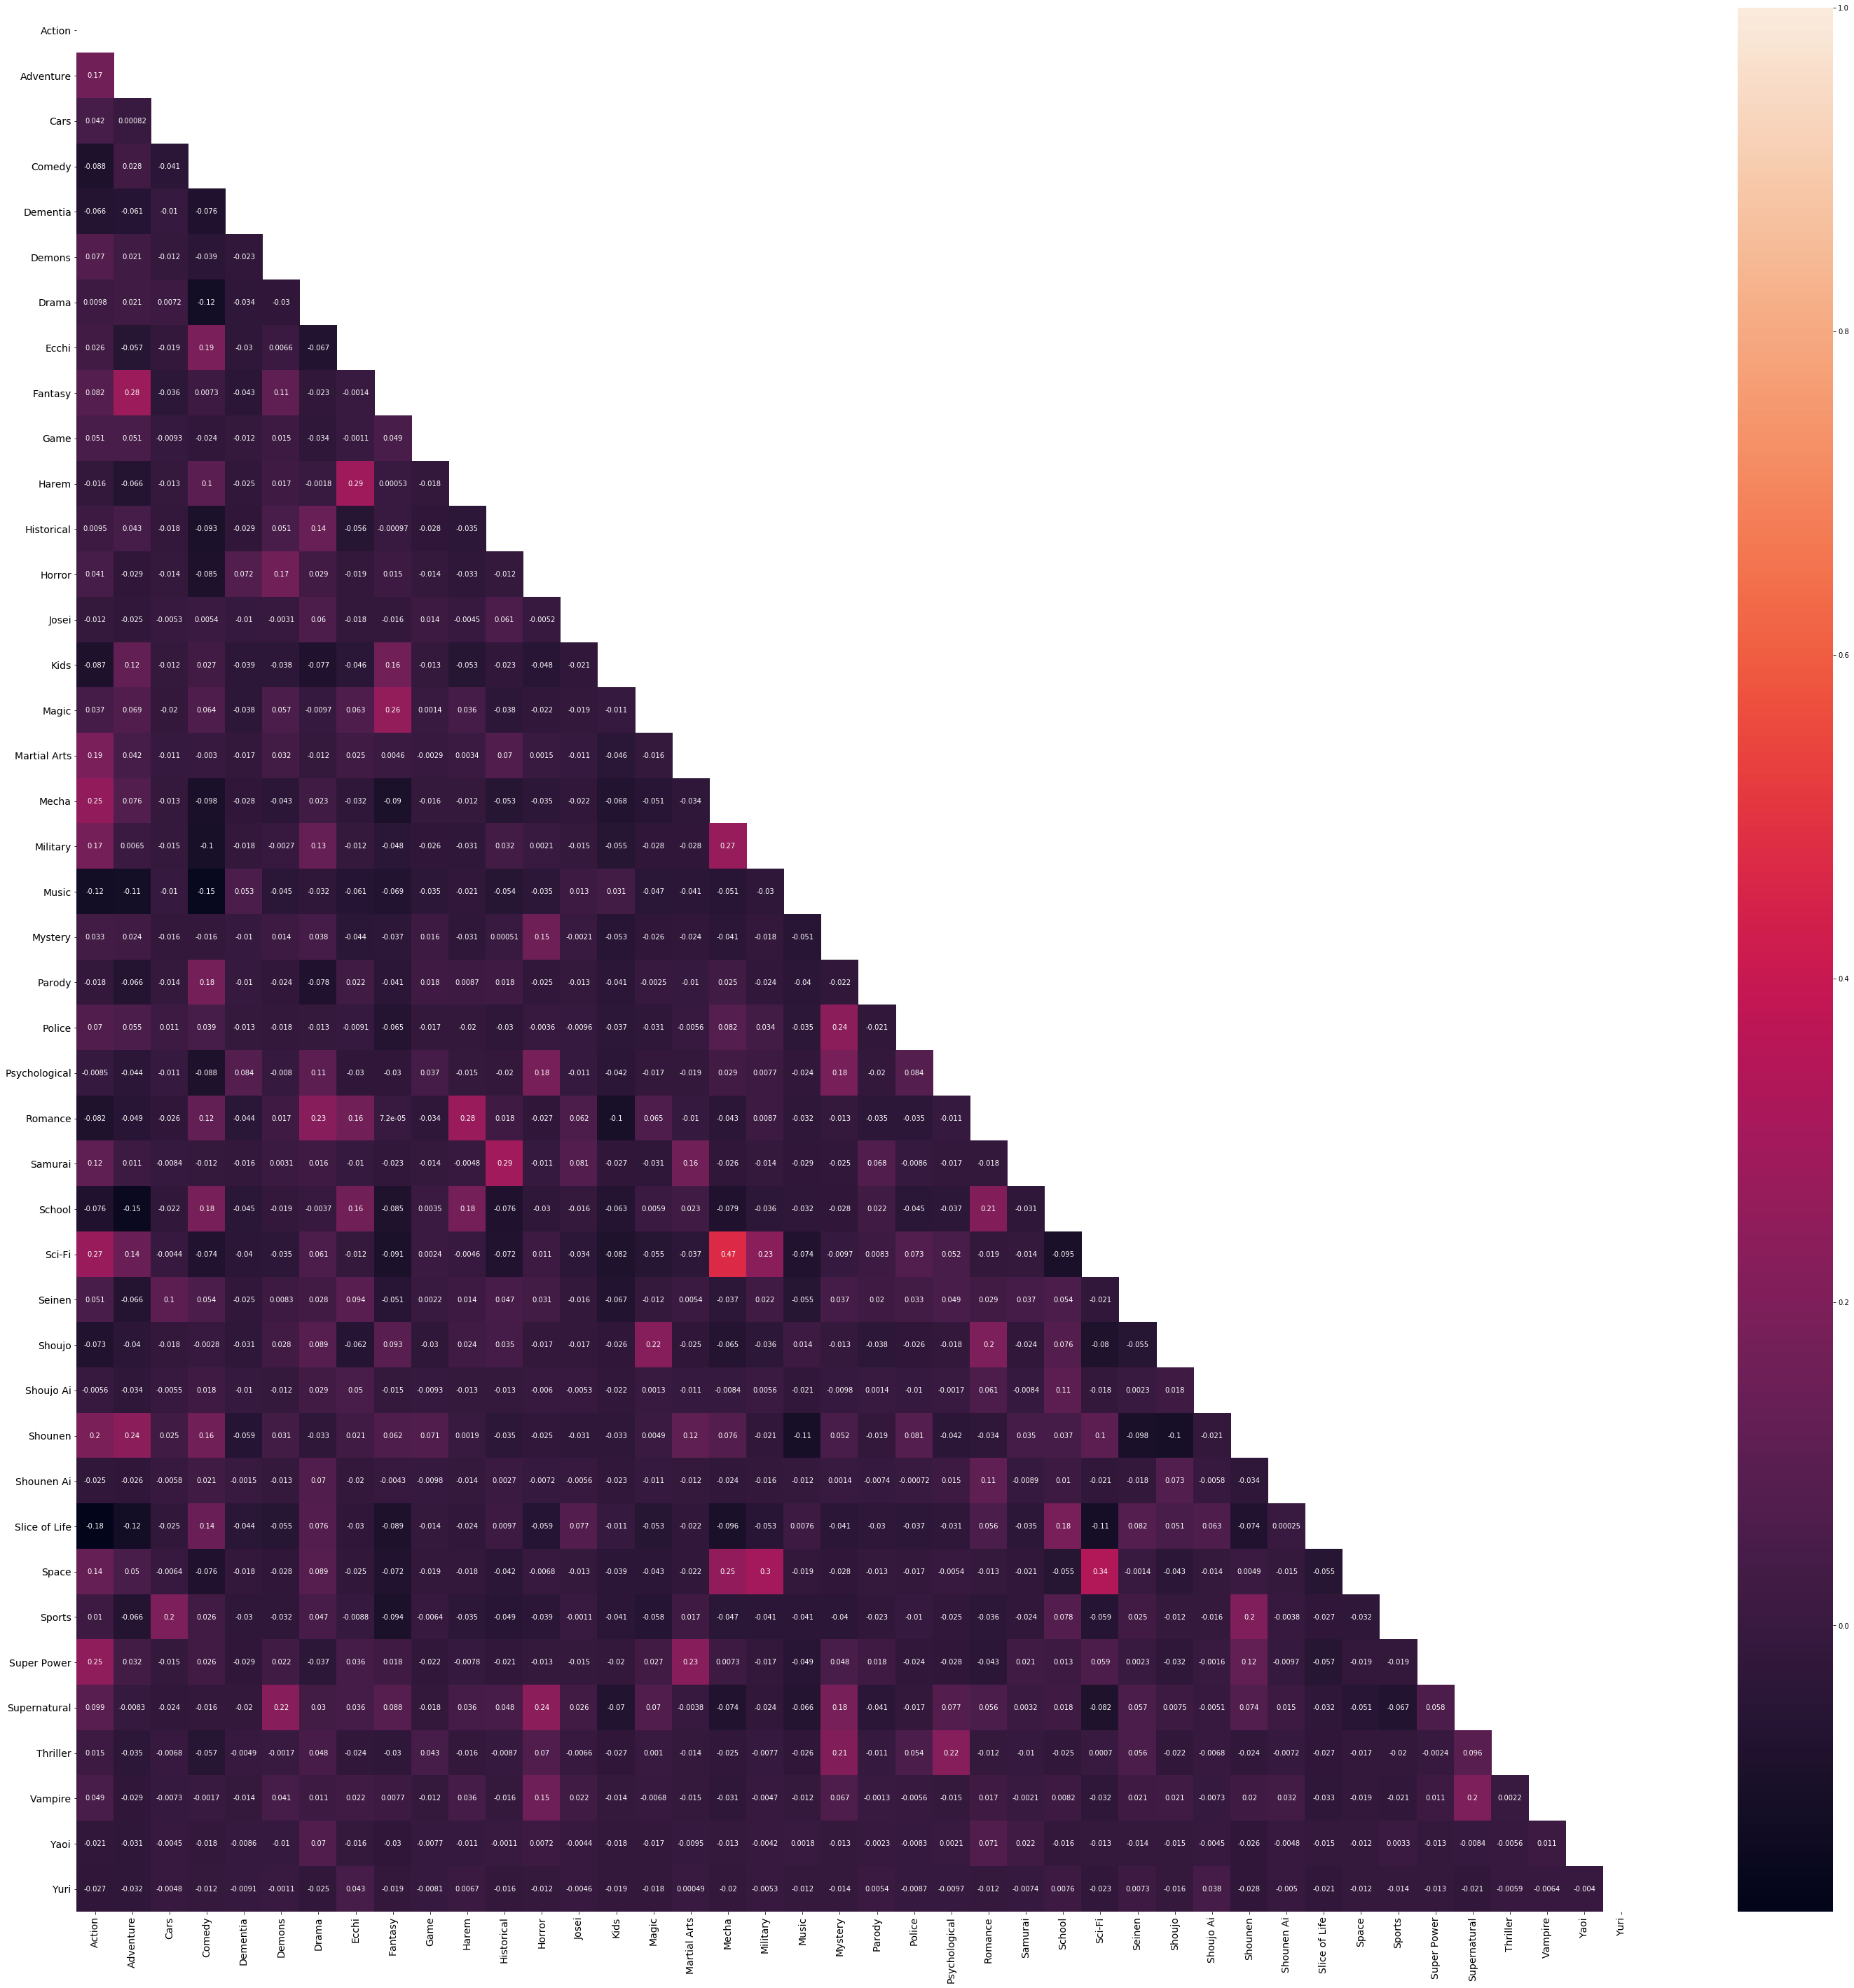

In [11]:
import numpy as np
%matplotlib inline
import seaborn as sns

def correlation_heat_map(df):
    corrs = anime_new2[['Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
                        'Game', 'Harem', 'Historical', 'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha',
                        'Military', 'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance', 'Samurai',
                        'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai', 'Shounen', 'Shounen Ai', 'Slice of Life',
                        'Space', 'Sports', 'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri']].corr()

    fig, ax = plt.subplots(figsize=(50,50))

    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    ax = sns.heatmap(corrs, mask=mask, annot=True)

    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    plt.show()
    
correlation_heat_map(anime_new2)

In [12]:
anime_list = anime_new2[['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']]
anime_list = anime_new[['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members']]

In [13]:
genre_split2 = pd.concat([anime_list.genre.str.get_dummies(sep=", ")], axis=1)
mas = MaxAbsScaler()
genre_split_fit = mas.fit_transform(genre_split2)
nn = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(genre_split_fit)
distances, indices = nn.kneighbors()

In [14]:
def obtain_animeindex(name):
    return anime_list[anime_list.name == name].index.tolist()[0]

def top_animes(anime):
    obtained_animeindex = obtain_animeindex(anime)
    for id in indices[obtained_animeindex][1:]:
        print (anime_list.ix[id]['name'])

In [15]:
top_animes('Noragami')

Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru
Noragami Aragoto
Yuu☆Yuu☆Hakusho: Eizou Hakusho
Tokyo Juushouden
Gensoumaden Saiyuuki OVA
Konjiki no Gash Bell!!: Mecha Vulkan no Raishuu
Konjiki no Gash Bell!!: 101 Banme no Mamono
Gensoumaden Saiyuuki Movie: Requiem - Erabarezaru Mono e no Chinkonka
Kouya no Shounen Isamu
Yumekui Merry


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [16]:
top_animes('Naruto')

Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono
Naruto Shippuuden: Sunny Side Battle
Boruto: Naruto the Movie
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!
Naruto: Shippuuden Movie 4 - The Lost Tower
Naruto: Shippuuden
Naruto x UT
Battle Spirits: Ryuuko no Ken
Kyutai Panic Adventure!
Katekyo Hitman Reborn!
